# First Exploraatory Data Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 10]
%matplotlib inline

In [28]:
types_dict = dict([('JOUR','object'),
                   ('CODE_STIF_TRNS','object'),
                   ('CODE_STIF_RES','object'),
                   ('CODE_STIF_ARRET','object'),
                   ('LIBELLE_ARRET','object'),
                   ('ID_REFA_LDA','object'),
                   ('CATEGORIE_TITRE','object'),
                   ('NB_VALD','float64')])

In [29]:
data_2016 = pd.read_csv("data/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2016.csv",
                        sep=';', na_values=['Moins de 5'],encoding='utf-8' ,dtype=types_dict)

FileNotFoundError: [Errno 2] File b'data/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2016.csv' does not exist: b'data/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2016.csv'

In [30]:
# data cleaning
data_2016['NB_VALD'] = data_2016['NB_VALD'].fillna(5)
data_2016['JOUR'] = pd.to_datetime(data_2016['JOUR'], format='%Y-%m-%d')


In [31]:
data_2016.describe(include='all')

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
count,859419,859419,859419,859419,859419,847216,859419,859419.000000
unique,181,3,14,696,678,667,9,NaN
top,2019-06-18 00:00:00,100,110,562,GARE DE LYON,73626,NAVIGO,NaN
freq,5145,421523,419998,1613,4496,4496,124285,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,899.940556
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835.242270
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [32]:
data_2016['CATEGORIE_TITRE'].value_counts(dropna=False)

NAVIGO         124285
IMAGINE R      123505
FGT            120118
TST            119944
AMETHYSTE      117915
?              109508
NAVIGO JOUR     83024
AUTRE TITRE     43480
NON DEFINI      17640
Name: CATEGORIE_TITRE, dtype: int64

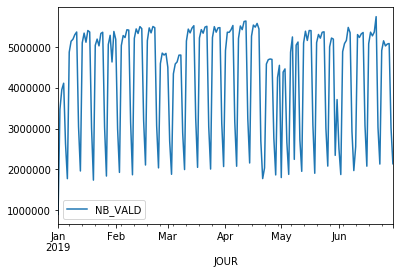

In [33]:
data_2016.groupby('JOUR').sum().plot()

In [36]:
data_2016.groupby(["JOUR",'LIBELLE_ARRET']).sum().groupby('LIBELLE_ARRET').mean()

,NB_VALD
LIBELLE_ARRET,
ABBESSES,3354.541436
ABLON,1294.666667
ACHERES-GRAND-CORMIER,69.055556
ACHERES-VILLE,4286.779006
AEROPORT CHARLES DE GAULLE 1,6303.071823
...,...
VOLTAIRE (LEON BLUM),11955.657459
VOSVES,18.320000
VULAINES-SUR-SEINE-SAMOREAU,36.927778


In [37]:
data_2016.groupby(["JOUR",'LIBELLE_ARRET']).sum().groupby('LIBELLE_ARRET').std()

,NB_VALD
LIBELLE_ARRET,
ABBESSES,731.342832
ABLON,519.805034
ACHERES-GRAND-CORMIER,22.717041
ACHERES-VILLE,1717.327043
AEROPORT CHARLES DE GAULLE 1,1989.795992
...,...
VOLTAIRE (LEON BLUM),3473.680650
VOSVES,7.631634
VULAINES-SUR-SEINE-SAMOREAU,20.336013
